In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize']=(5.0,4.0)  #set default size of plots
plt.rcParams['image.interpolation']='nearest'  #图片放大的风格
plt.rcParams['image.cmap']='gray'  

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig,train_y,test_x_orig,test_y,classes=load_data()

In [3]:
m_train=train_x_orig.shape[0]
num_px=train_x_orig.shape[1]
m_test=test_x_orig.shape[0]

In [4]:
#Reshape the  training and test examples
train_x_flatten=train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten=test_x_orig.reshape(test_x_orig.shape[0],-1).T

#Standardize data to have feature values between 0 and 1
train_x=train_x_flatten/255
test_x=test_x_flatten/255

In [5]:
n_x=12288
n_h=7
n_y=1
layer_dims=(n_x,n_h,n_y)

In [6]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    np.random.seed(1)
    grads={}
    costs=[]  #to keep track of th cost
    m=X.shape[1]  #number of examples
    (n_x,n_h,n_y)=layer_dims
    
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    for i in range(0,num_iterations):
        
        A1,cache1=linear_activation_forward(X,W1,b1,activation="relu")
        A2,cache2=linear_activation_forward(A1,W2,b2,activation="sigmoid")
        
        cost=compute_cost(A2,Y)
        dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
    #    dA1,dW2,db2==linear_activation_backward(dA2,cache2,activation="sigmoid")
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,activation="relu")
        
        grads["dW1"]=dW1
        grads["db1"]=db1
        grads["dW2"]=dW2
        grads["db2"]=db2
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        W1=parameters["W1"]
        b1=parameters["b1"]
        W2=parameters["W2"]
        b2=parameters["b2"]
        
        if print_cost and i%100==0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i%100==0:
            costs.append(cost)
        
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations(per tens)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
        
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203887
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.33942815383664127
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213015
Cost after iteration 1300: 0.24681768210614827
Cost after iteration 1400: 0.1985073503746609
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978096686
Cost after iteration 1700: 0.11306524562164708
Cost after iteration 1800: 0.0962942684593714
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.07439078704319078
Cost after iteration 2100: 0.0663074813

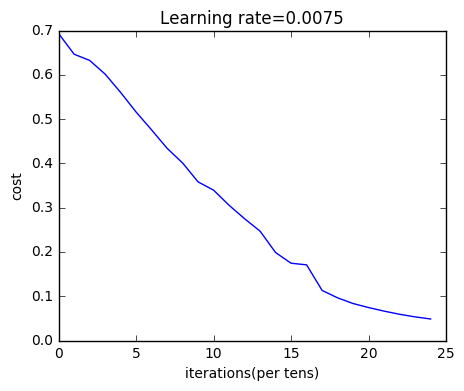

In [7]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [8]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [9]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [10]:
layers_dims=[12288,20,7,5,1]

In [11]:
#L_Layer_Model

def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    np.random.seed(1)
    costs=[]
    
    parameters=initialize_parameters_deep(layers_dims)
    
    for i in range(0,num_iterations):
        AL,caches=L_model_forward(X,parameters)
        cost=compute_cost(AL,Y)
        grads=L_model_backward(AL,Y,caches)
        parameters=update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%100==0 :
            print("Cost after iteration %i:%f" %(i,cost))
        if print_cost and i%100==0:
            costs.append(cost)
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning rate= '+str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0:0.771749
Cost after iteration 100:0.672053
Cost after iteration 200:0.648263
Cost after iteration 300:0.611507
Cost after iteration 400:0.567047
Cost after iteration 500:0.540138
Cost after iteration 600:0.527930
Cost after iteration 700:0.465477
Cost after iteration 800:0.369126
Cost after iteration 900:0.391747
Cost after iteration 1000:0.315187
Cost after iteration 1100:0.272700
Cost after iteration 1200:0.237419
Cost after iteration 1300:0.199601
Cost after iteration 1400:0.189263
Cost after iteration 1500:0.161189
Cost after iteration 1600:0.148214
Cost after iteration 1700:0.137775
Cost after iteration 1800:0.129740
Cost after iteration 1900:0.121225
Cost after iteration 2000:0.113821
Cost after iteration 2100:0.107839
Cost after iteration 2200:0.102855
Cost after iteration 2300:0.100897
Cost after iteration 2400:0.092878


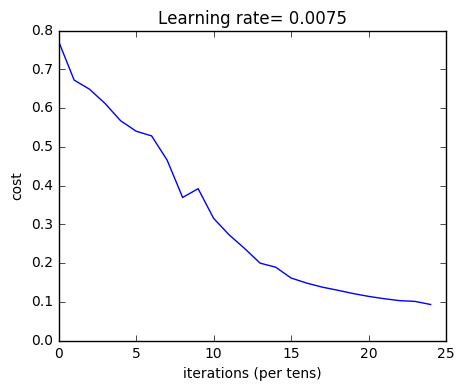

In [12]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [13]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [14]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


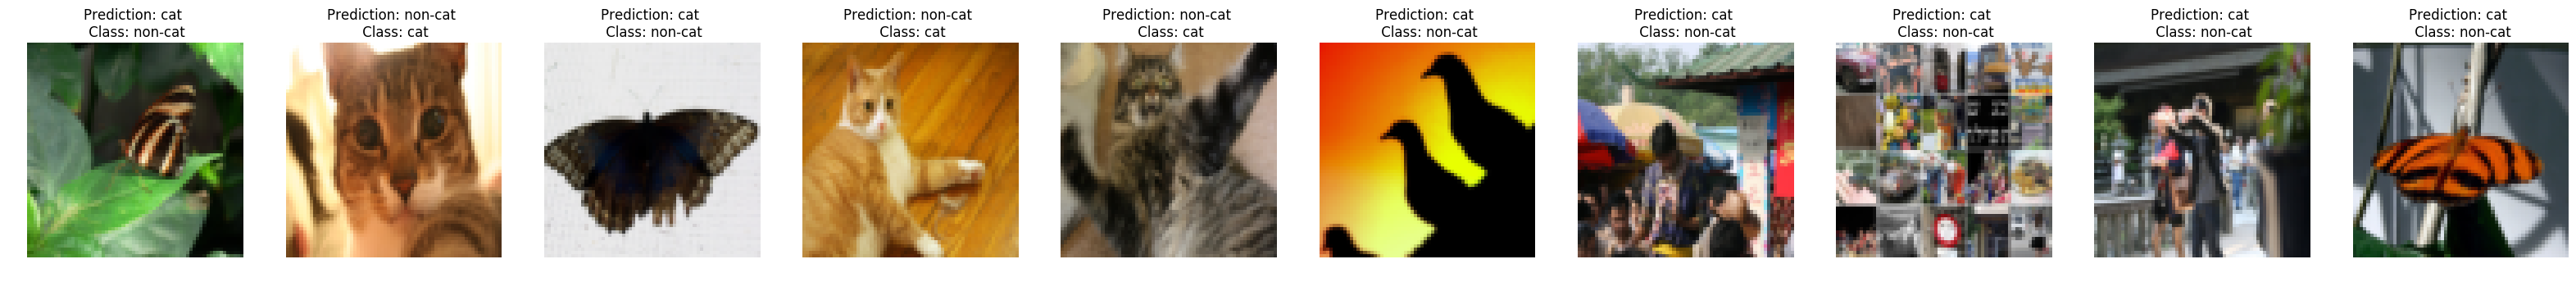

In [15]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
C:\新建文件夹\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


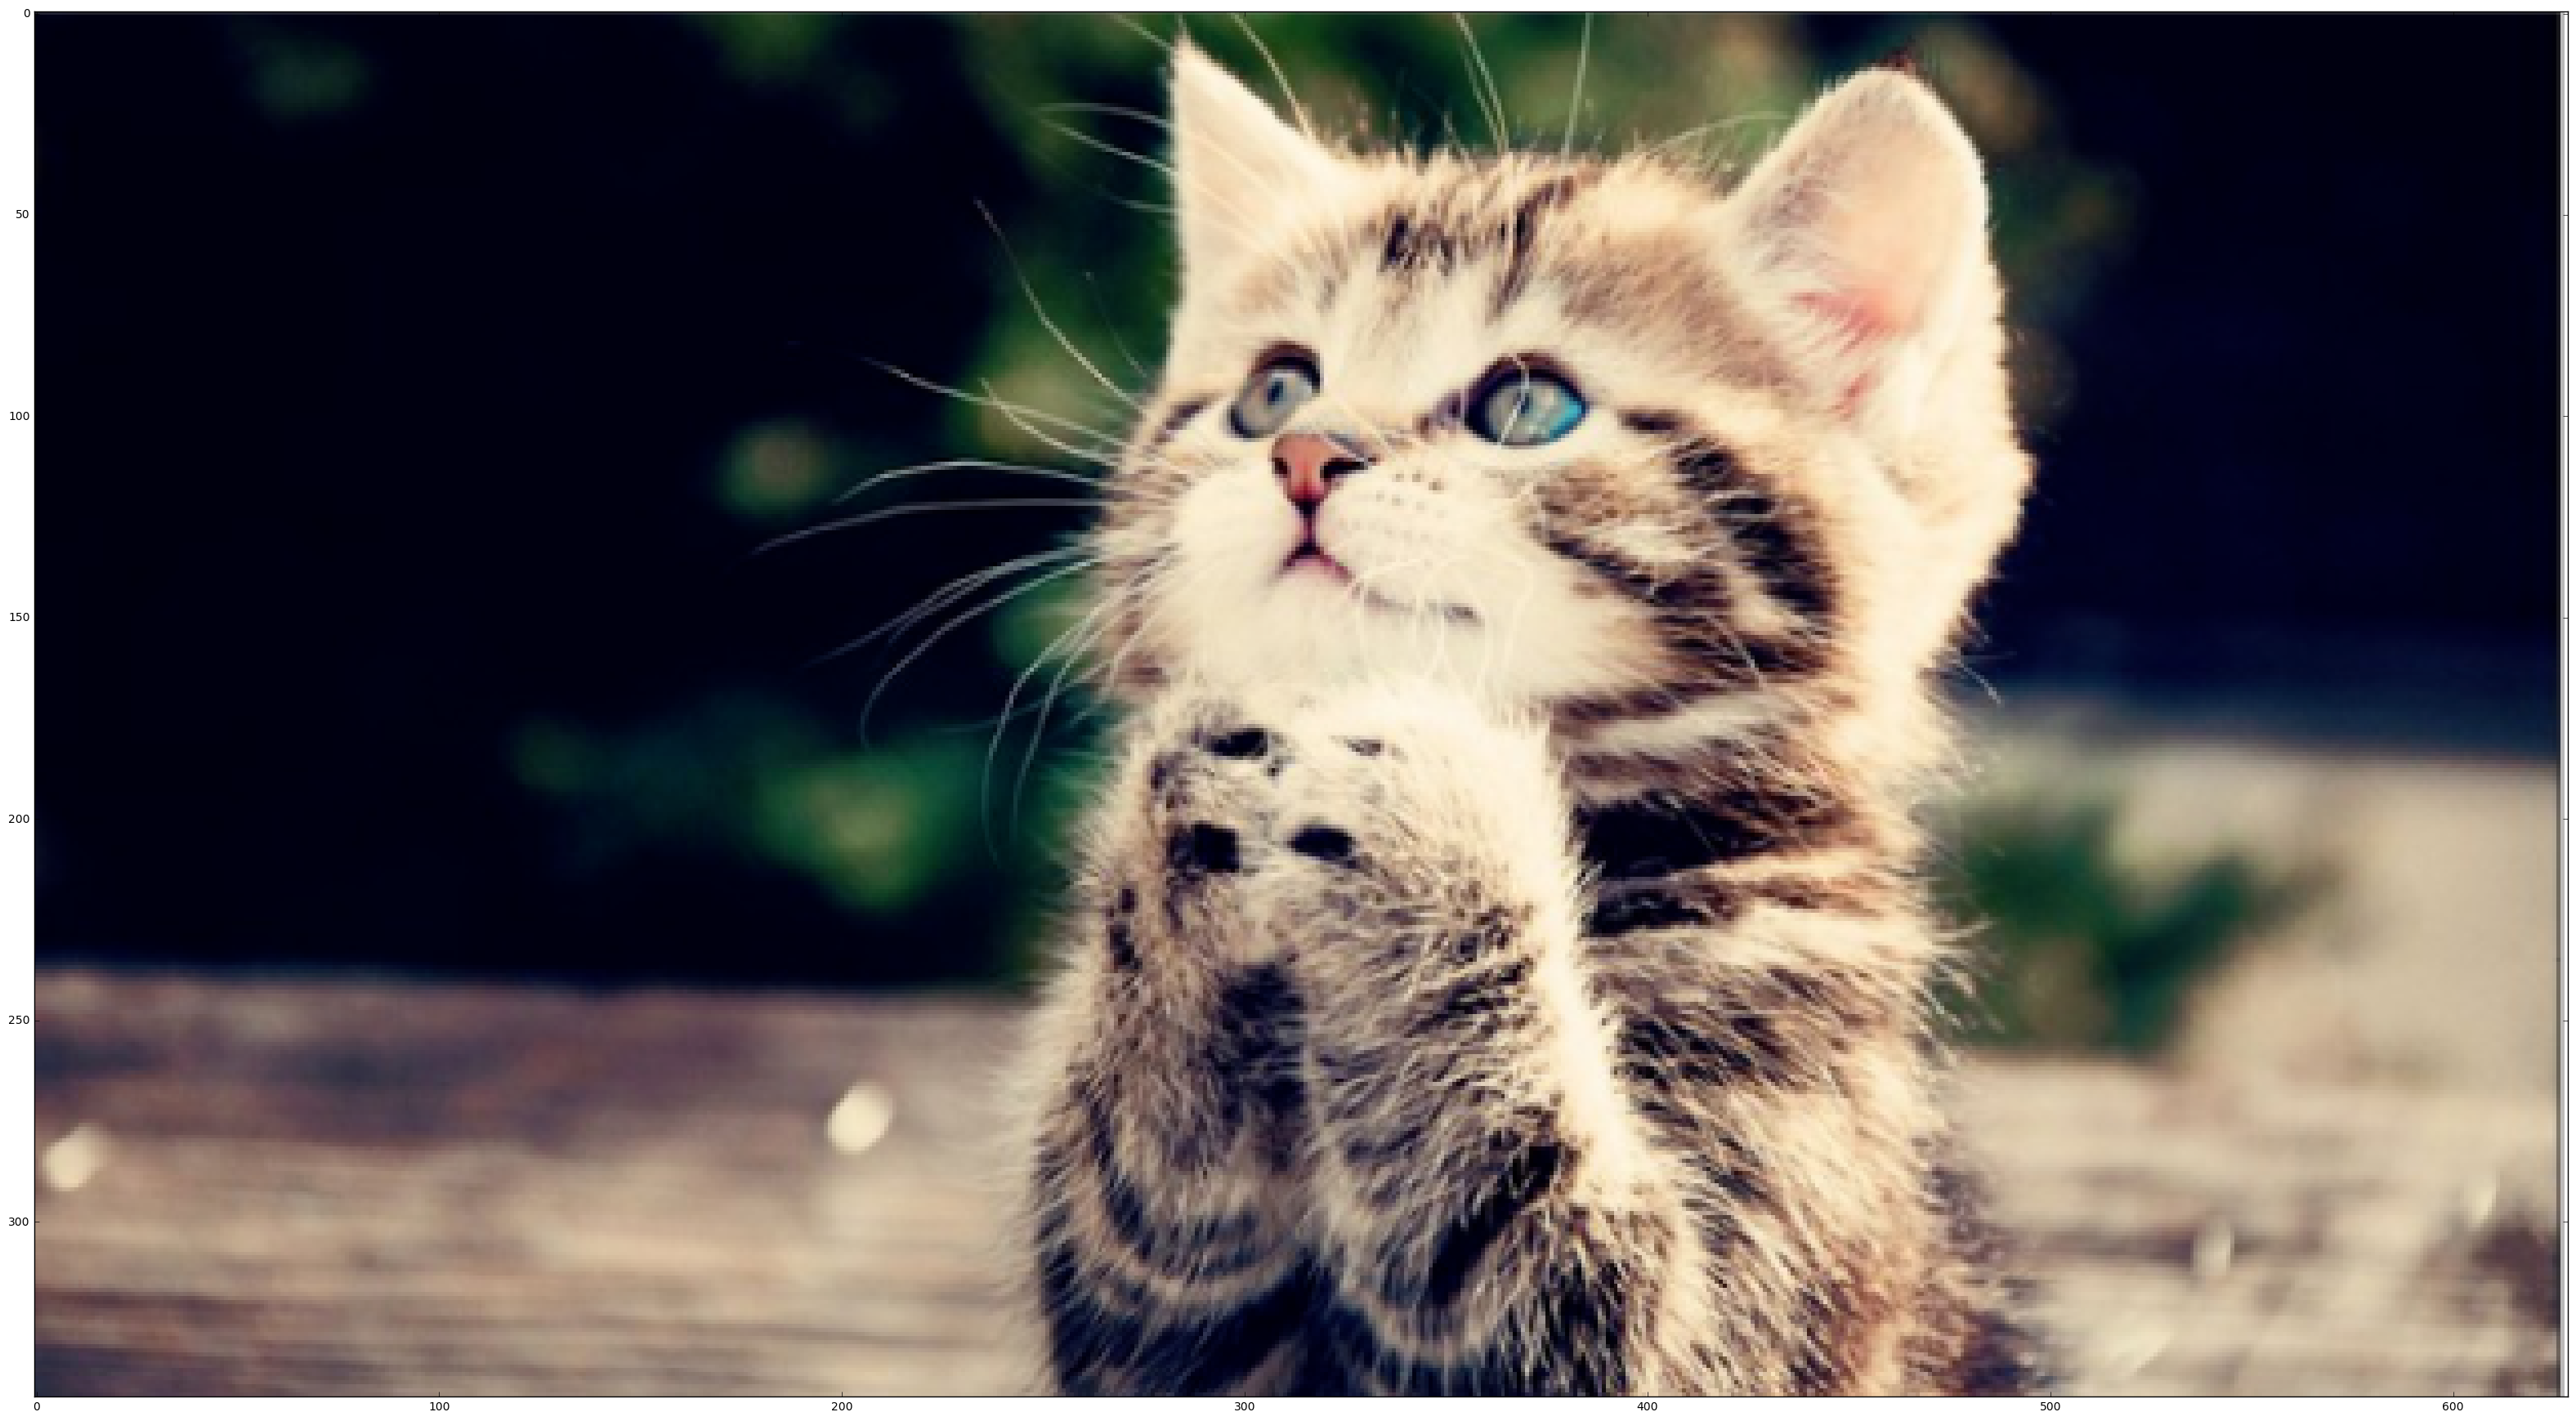

In [18]:
my_image = "my_image.png" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")